 # Plotting MCMC Chains generated with Firecrown

In this notebook, we plot the $9$ different chains generated with Firecrown and cosmosis. Let us discuss how the data was generated and how is the analysis done.

## Data

The data was generated with the NumCosmo library. We used the [Tinker08](https://arxiv.org/abs/0803.2706) mass function with critical overdensity $\Delta_c = 200$. We generated a catalog of clusters with a given mass, redshift and richness. We can use the mass function to generate clusters with a given a mass at a given redshift, but to generate its richness, we used the richness-mass relation described in [Murata et al](https://arxiv.org/abs/1707.01907). Explictly, the probability of a cluster with mass $M$ at redshift $z$ having a richness $ln \lambda$ is given by
$$$$
\begin{align}
P(\ln \lambda \mid M, z)=\frac{1}{\sqrt{2 \pi} \sigma_{\ln \lambda \mid M, z}} \exp \left(-\frac{x^2(\lambda, M, z)}{2 \sigma_{\ln \lambda \mid M, z}^2}\right),
\end{align}
$$$$
such that
$$$$
\begin{align}
\begin{aligned}
x(\lambda, M, z) & \equiv \ln \lambda-\left[\mu_0+\mu_M \ln \left(\frac{M}{M_{\text {pivot }}}\right)\right. \\
& \left.+\mu_z \ln \left(\frac{1+z}{1+z_{\text {pivot }}}\right)\right] .
\end{aligned}
\end{align}
$$$$
and
$$$$
\begin{align}
\sigma_{\ln N \mid M, z} & =\sigma_0+\sigma_M \ln \left(\frac{M}{M_{\mathrm{pivot}}}\right) \\
& +\sigma_z \ln \left(\frac{1+z}{1+z_{\mathrm{pivot}}}\right)
\end{align}
.$$$$
In the above, the pivot quantities are constants and $\vec{\theta} = [\mu_0,\mu_M,\mu_z, \sigma_0, \sigma_M, \sigma_z]$ are the richness-mass parameters.
Besides the mass function and the richness-mass relation, we also needed to define an sky area where we are going to generate our data and a covariance computed from the data. These informations can be found on the data generation files for each analysis.

## Model

We want to use cluster counts and the mean mass inside each bin to probe cosmology and constrain the richness-mass relation. Thus we need to compute the theory predictions of these quantities, which are respectively given by
$$$$
\begin{align}
N_{\alpha\beta}^{\rm predicted} = \Omega_s\int_{z_\alpha}^{z_{\alpha + 1}} dz\int_{\log_{10}M_{min}}^{\log_{10}M_{max}}\int_{\log_{10}\lambda_{\beta }}^{\log_{10}\lambda_{\beta +1}}\frac{d^2V(z)}{dz d\Omega}\frac{dn(M,z)}{d\log_{10}M}P(\ln \lambda \mid M, z)d\log_{10}Md\log_{10}\lambda
,\end{align}
$$$$
and 
$$$$
\begin{align}
\left<M\right>_{\alpha\beta}^{\rm predicted} = \frac{1}{N_{\alpha\beta}^{\rm predicted}}\Omega_s\int_{z_\alpha}^{z_{\alpha + 1}} dz\int_{\log_{10}M_{min}}^{\log_{10}M_{max}}\int_{\log_{10}\lambda_{\beta }}^{\log_{10}\lambda_{\beta +1}}\frac{d^2V(z)}{dz d\Omega}log_{10}M\frac{dn(M,z)}{d\log_{10}M}P(\ln \lambda \mid M, z)d\log_{10}Md\log_{10}\lambda
,\end{align}
$$$$
such that $\frac{dn(M,z)}{d\log_{10}M}$ is the mass function, $\alpha$ and $\beta$ represent the bins, $\frac{d^2V(z)}{dz d\Omega}$ is the volume element and $\Omega_s$ is the sky area of the survey. For all the cases that we describe below, we are using the same mass function that was used to generate the catalog, that is, the Tinker08 mass fucntion.

Once we have computed the theoritical prediction, we build a Gaussian likelihood between the data and the prediction quantities, using a data driven convariace. Let us now read the chains generated for each analysis.


In [1]:
import pandas as pd
from getdist import plots
from getdist import MCSamples
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from cosmosis.postprocess import parser
from cosmosis.postprocessing.inputs import read_input
from cosmosis.postprocessing.postprocess import postprocessor_for_sampler
from cosmosis.postprocessing.plots import (
    MetropolisHastingsPlots2D,
    MetropolisHastingsPlots1D,
)

import os
import corner
from chainconsumer import ChainConsumer
import matplotlib.pyplot as plt
from IPython.display import display, Math

First we read the chains using cosmosis postprocessing

In [2]:
cosmo_both = read_input(
    "/pbs/home/e/ebarroso/firecrown/examples/mean_mass_tests/Fitt_cosmology/both/output/number_counts_samples.txt"
)
cosmo_mass = read_input(
    "/pbs/home/e/ebarroso/firecrown/examples/mean_mass_tests/Fitt_cosmology/mean_mass/output/number_counts_samples.txt"
)
cosmo_rich = read_input(
    "/pbs/home/e/ebarroso/firecrown/examples/mean_mass_tests/Fitt_cosmology/richness/output/number_counts_samples.txt"
)
rich_both = read_input(
    "/pbs/home/e/ebarroso/firecrown/examples/mean_mass_tests/Fitt_Richness/both/output/number_counts_samples.txt"
)
rich_mass = read_input(
    "/pbs/home/e/ebarroso/firecrown/examples/mean_mass_tests/Fitt_Richness/mean_mass/output/number_counts_samples.txt"
)
rich_rich = read_input(
    "/pbs/home/e/ebarroso/firecrown/examples/mean_mass_tests/Fitt_Richness/richness/output/number_counts_samples.txt"
)
both_both = read_input(
    "/pbs/home/e/ebarroso/firecrown/examples/mean_mass_tests/Fitt_Both/both/output/number_counts_samples.txt"
)
both_mass = read_input(
    "/pbs/home/e/ebarroso/firecrown/examples/mean_mass_tests/Fitt_Both/mean_mass/output/number_counts_samples.txt"
)
both_rich = read_input(
    "/pbs/home/e/ebarroso/firecrown/examples/mean_mass_tests/Fitt_Both/richness/output/number_counts_samples.txt"
)

LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/firecrown/examples/mean_mass_tests/Fitt_cosmology/both/output/number_counts_samples.txt
LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/firecrown/examples/mean_mass_tests/Fitt_cosmology/mean_mass/output/number_counts_samples.txt
LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/firecrown/examples/mean_mass_tests/Fitt_cosmology/richness/output/number_counts_samples.txt
LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/firecrown/examples/mean_mass_tests/Fitt_Richness/both/output/number_counts_samples.txt
LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/firecrown/examples/mean_mass_tests/Fitt_Richness/mean_mass/output/number_counts_samples.txt
LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/firecrown/examples/mean_mass_tests/Fitt_Richness/richness/output/number_counts_samples.txt
LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/firecrown/examples/mean_mass_tests/Fitt_Both/both/output/number_counts_samples.txt
LOADING CHAIN FROM FILE:  /pbs/home/e/ebarros

Here, we only take the parts of the output file that we are interested in.

In [3]:
data_cb = []
for line in cosmo_both[1]["data"][1][0]:
    data_cb.append([line[0], line[1]])

data_cm = []
for line in cosmo_mass[1]["data"][1][0]:
    data_cm.append([line[0], line[1]])

data_cr = []
for line in cosmo_rich[1]["data"][1][0]:
    data_cr.append([line[0], line[1]])


## First Case: Fitting Cosmology parameters

In this case, we use the true values of the richness-proxy relation to try to fit only the cosmological parameters. We have three different cases:
    
    - Using just the mean mass inside each bin of redshift and richness (since this is a mock catalog, we know the true mean mass of the data).
    - Using just the counts inside each bin of redshift and richness.
    - Using both informations.
    
We want to fit the cosmological parameters that are implict in the mass function, $\frac{dn(M,z)}{d\log_{10}M}$, while using the true values of the richness-mass relation.

In [4]:
names = [
    '1',
    '2',
]
labels = [r"\Omega_m", r"\sigma_8"]
settings = {
    "mult_bias_correction_order": 0,
    "smooth_scale_2D": 3,
    "smooth_scale_1D": 3,
    "boundary_correction_order": 0,
}
samples1 = MCSamples(samples=np.array(data_cb), names=names, labels=labels, settings=settings)
samples2 = MCSamples(samples=np.array(data_cm), names=names, labels=labels, settings=settings)
samples3 = MCSamples(
    samples=np.array(data_cr),
    names=names,
    labels=labels,
    settings=settings,
)
samples1.removeBurn(0.3)
samples2.removeBurn(0.3)
samples3.removeBurn(0.3)


Removed no burn in
Removed no burn in
Removed no burn in


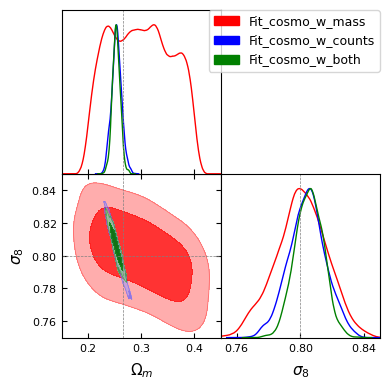


 The best fit for the three cases are: 


 Using data from mean mass only 



<IPython.core.display.Math object>

<IPython.core.display.Math object>


 Using data from counts only 



<IPython.core.display.Math object>

<IPython.core.display.Math object>


 Using data from both 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
# Triangle plot
g = plots.get_subplot_plotter()
g.triangle_plot(
    [samples2, samples3, samples1],
    filled=True,
    alphas=[0.8,0.55],
    contour_ls="-",
    contour_lws=1,
    fine_bins=1,
    colors=['red','blue', 'green'],
    line_args=[{'lw':1.2,'ls':'-', 'color':'red'},{'lw':1.2,'ls':'-', 'color':'blue'},{'lw':1.2,'ls':'-', 'color':'green'}],
    marker_args={"linewidth": 4},
    markers={"1": 0.26448, "2": 0.800},
    legend_labels=["Fit_cosmo_w_mass", "Fit_cosmo_w_counts", "Fit_cosmo_w_both"],
    param_limits={'1': [0.15, 0.45],
                '2' : [.75, 0.85]},
)

plt.show()

print("\n The best fit for the three cases are: \n")
print("\n Using data from mean mass only \n")

display(Math(samples2.getInlineLatex('1',limit=1)))
display(Math(samples2.getInlineLatex('2',limit=1)))
print("\n Using data from counts only \n")
display(Math(samples3.getInlineLatex('1',limit=1)))
display(Math(samples3.getInlineLatex('2',limit=1)))
print("\n Using data from both \n")
display(Math(samples1.getInlineLatex('1',limit=1)))
display(Math(samples1.getInlineLatex('2',limit=1)))

## Second Case: Fitting Richness-mass relation parameters

In this case, we use the true values of the cosmology and try to fit only the 6 richness-proxy relation parameters. We have three different cases:
    
    - Using just the mean mass inside each bin of redshift and richness (since this is a mock catalog, we know the true mean mass of the data).
    - Using just the counts inside each bin of redshift and richness.
    - Using both informations.
    
    
We want to fit the richness-mass relation parameters that are in $P(\ln \lambda \mid M, z)$, while using the true cosmological values in the mass function.

In [6]:
data_rb = []
for line in rich_both[1]["data"][1][0]:
    data_rb.append([line[0], line[1], line[2], line[3], line[4], line[5]])

data_rm = []
for line in rich_mass[1]["data"][1][0]:
    data_rm.append([line[0], line[1], line[2], line[3], line[4], line[5]])

data_rr = []
for line in rich_rich[1]["data"][1][0]:
    data_rr.append([line[0], line[1], line[2], line[3], line[4], line[5]])
    


Removed no burn in
Removed no burn in
Removed no burn in


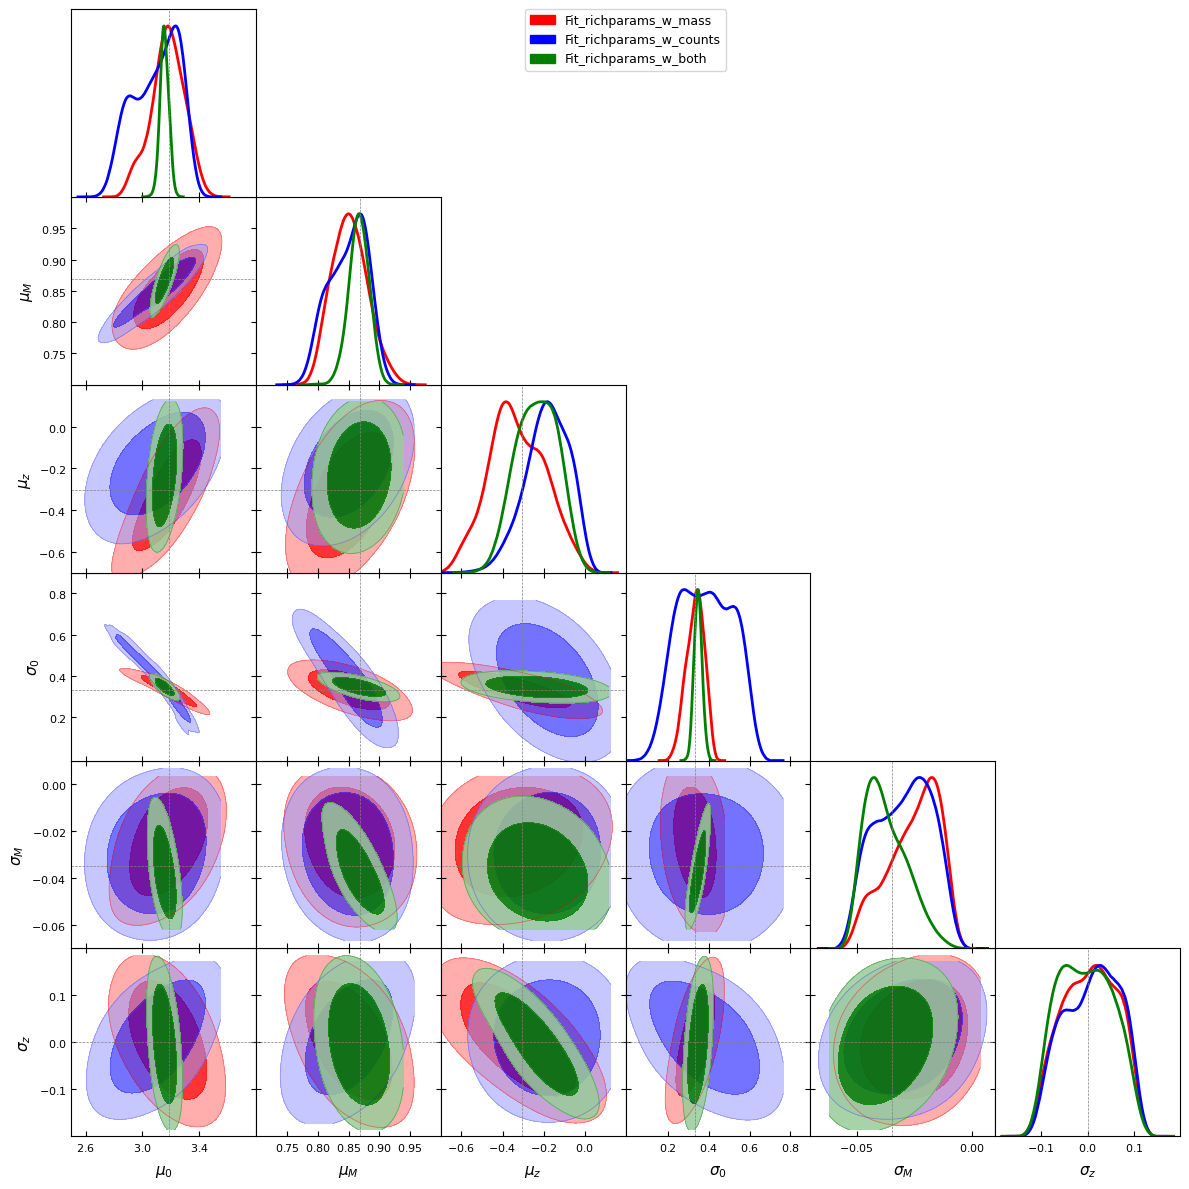


 The best fit for the three cases are: 


 Using data from mean mass only 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


 Using data from counts only 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


 Using data from both 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
# Triangle plot
names = [
    "1",
    "2",
    "3",
    "4",
    "5",
    "6",
]
labels = [r"\mu_{0}", r"\mu_{M}", r"\mu_{z}", r"\sigma_{0}", r"\sigma_{M}", r"\sigma_{z}"]
settings = {
    "mult_bias_correction_order": 0,
    "smooth_scale_2D": 8,
    "smooth_scale_1D": 6,
    "boundary_correction_order": 0,
}



samples4 = MCSamples(
    samples=np.array(data_rb),
    names=names,
    labels=labels,
    settings=settings,
)
samples5 = MCSamples(
    samples=np.array(data_rm),
    names=names,
    labels=labels,
    settings=settings,
)
samples6 = MCSamples(
    samples=np.array(data_rr),
    names=names,
    labels=labels,
    settings=settings,
)
samples4.removeBurn(0.3)
samples5.removeBurn(0.3)
samples6.removeBurn(0.3)

g = plots.get_subplot_plotter()
g.triangle_plot(
    [samples5, samples6, samples4],
    filled=[True,True,True],
    alphas=[0.8,0.55],
    colors=['red','blue', 'green'],
    contour_ls="-",
    contour_lws=2,
    fine_bins=1,
    marker_args={"linewidth": 4},
    line_args=[{'lw':1.2,'ls':'-', 'color':'red'},{'lw':1.2,'ls':'-', 'color':'blue'},{'lw':1.2,'ls':'-', 'color':'green'}],
    markers={"1": 3.19, "2": 0.8685889638,"3":  -0.30400613733, "4": 0.33,"5": -0.0347435585, "6": 0.0},
    legend_labels=["Fit_richparams_w_mass", "Fit_richparams_w_counts", "Fit_richparams_w_both"],
        param_limits={'1': [2.5, 3.8],
                '2' : [.7, 1.], 
                     '3':[-.7, 0.2],
                     '4':[-0.01, 0.9],
                     '5':[-.07, 0.01],
                     '6':[-.2, 0.2],},
                
)

plt.show()
print("\n The best fit for the three cases are: \n")
print("\n Using data from mean mass only \n")
for item in range(1,7):
    display(Math(samples5.getInlineLatex(f'{item}',limit=2)))
print("\n Using data from counts only \n")
for item in range(1,7):
    display(Math(samples6.getInlineLatex(f'{item}',limit=2)))
print("\n Using data from both \n")
for item in range(1,7):
    display(Math(samples4.getInlineLatex(f'{item}',limit=2)))

## Third Case: Fitting both the cosmology and the Richness-mass relation parameters

In this case, we try to fit all the 8 parameters at once (2 from cosmology and 6 richness-proxy relation parameters). We have three different cases:
    
    - Using just the mean mass inside each bin of redshift and richness (since this is a mock catalog, we know the true mean mass of the data).
    - Using just the counts inside each bin of redshift and richness.
    - Using both informations.

In [8]:
data_bb = []
for line in both_both[1]["data"][1][0]:
    data_bb.append([line[0], line[1], line[2], line[3], line[4], line[5], line[6], line[7]])

data_bm = []
for line in both_mass[1]["data"][1][0]:
    data_bm.append([line[0], line[1], line[2], line[3], line[4], line[5], line[6], line[7]])

data_br = []
for line in both_rich[1]["data"][1][0]:
    data_br.append([line[0], line[1], line[2], line[3], line[4], line[5], line[6], line[7]])
    


Removed no burn in
Removed no burn in
Removed no burn in


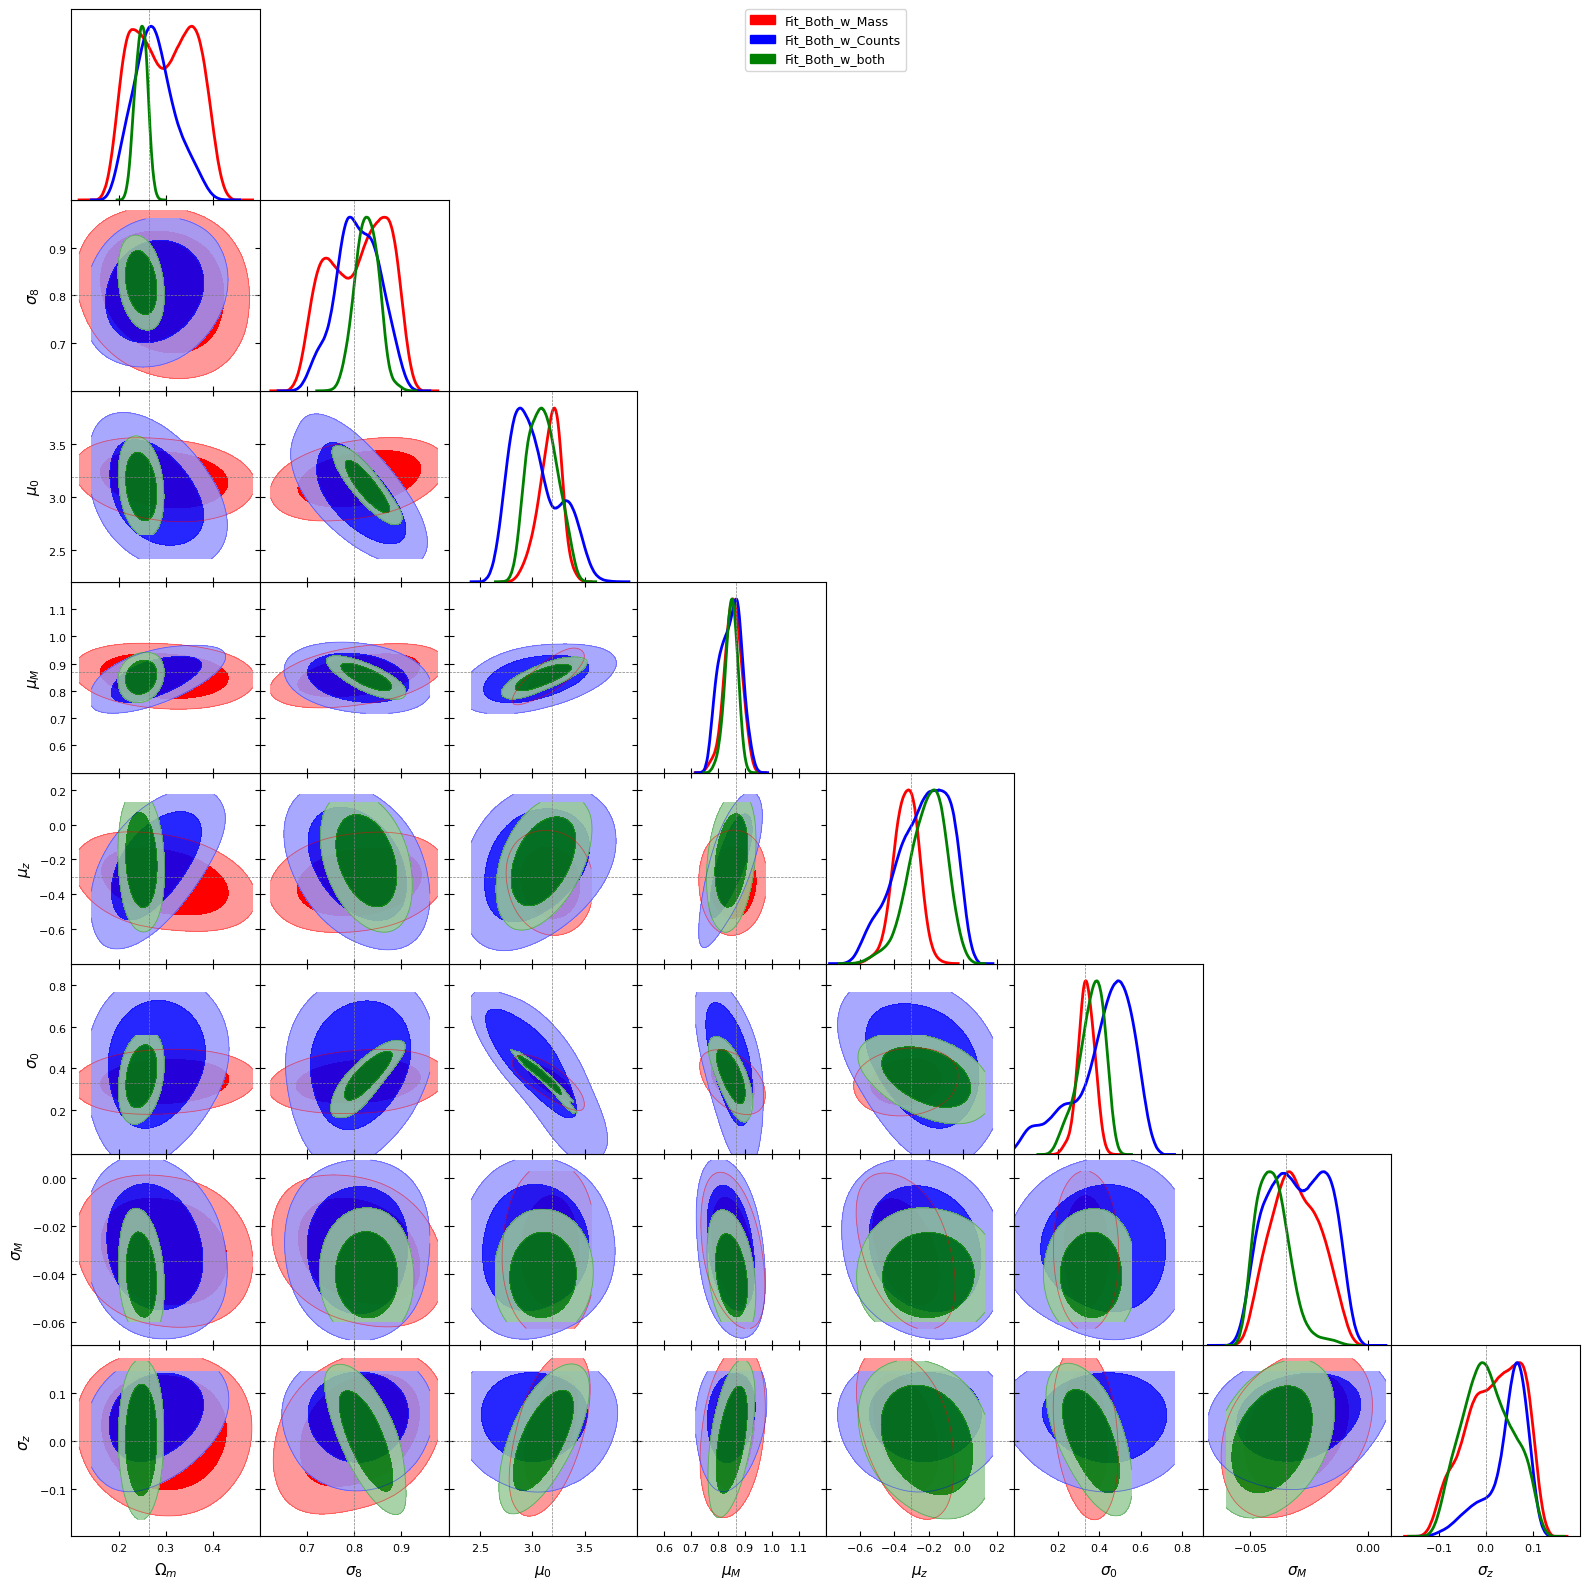


 The best fit for the three cases are: 


 Using data from mean mass only 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


 Using data from counts only 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


 Using data from both 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
# Triangle plot
names = [
    "1",
    "2",
    "3",
    "4",
    "5",
    "6",
    "7",
    "8",
]
labels = [r"\Omega_m", r"\sigma_8",r"\mu_{0}", r"\mu_{M}", r"\mu_{z}", r"\sigma_{0}", r"\sigma_{M}", r"\sigma_{z}"]
settings = {
    "mult_bias_correction_order": 0,
    "smooth_scale_2D": 8,
    "smooth_scale_1D": 6,
    "boundary_correction_order": 0,
}



samples7 = MCSamples(
    samples=np.array(data_bb),
    names=names,
    labels=labels,
    settings=settings,
)
samples8 = MCSamples(
    samples=np.array(data_bm),
    names=names,
    labels=labels,
    settings=settings,
)
samples9 = MCSamples(
    samples=np.array(data_br),
    names=names,
    labels=labels,
    settings=settings,
)
samples7.removeBurn(0.3)
samples8.removeBurn(0.3)
samples9.removeBurn(0.3)

g = plots.get_subplot_plotter()
g.triangle_plot(
    [samples8, samples9, samples7],
    filled=True,
    alpha = [0.8, 0.55],
    contour_ls="-",
    contour_lws=2,
    fine_bins=1,
    marker_args={"linewidth": 4},
    colors=['red','blue', 'green'],
    line_args=[{'lw':1.2,'ls':'-', 'color':'red'},{'lw':1.2,'ls':'-', 'color':'blue'},{'lw':1.2,'ls':'-', 'color':'green'}],
    markers={"1": 0.26448, "2": 0.800, "3": 3.19, "4": 0.8685889638,"5":  -0.30400613733, "6": 0.33,"7": -0.0347435585, "8": 0.0},
    legend_labels=["Fit_Both_w_Mass", "Fit_Both_w_Counts", "Fit_Both_w_both"],
            param_limits={'1': [0.1, 0.5],
                '2' : [.6, 1.],
                '3': [2.2, 4.0],
                '4' : [.5, 1.2], 
                '5':[-.8, 0.3],
                '6':[-0.01, 0.9],
                '7':[-.07, 0.01],
                '8':[-.2, 0.2],}
)

plt.show()

print("\n The best fit for the three cases are: \n")
print("\n Using data from mean mass only \n")
for item in range(1,9):
    display(Math(samples8.getInlineLatex(f'{item}',limit=2)))
print("\n Using data from counts only \n")
for item in range(1,9):
    display(Math(samples9.getInlineLatex(f'{item}',limit=2)))
print("\n Using data from both \n")
for item in range(1,9):
    display(Math(samples7.getInlineLatex(f'{item}',limit=2)))